In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv("house.csv")
print(df.columns)


Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating'],
      dtype='object')


In [ ]:
print("Dataset shape before removing outliers:", df.shape)
print("Max value in 'bedRoom' column:", df['bedRoom'].max())
print("Max value in 'bathroom' column:", df['bathroom'].max())

Dataset shape before removing outliers: (964, 20)
Max value in 'bedRoom' column: 36
Max value in 'bathroom' column: 36


In [ ]:
numeric_cols = ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom']
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Apply filter
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [ ]:
print("Dataset shape after removing outliers:", df.shape)
print("Max value in 'bedRoom' column:", df['bedRoom'].max())
print("Max value in 'bathroom' column:", df['bathroom'].max())

Dataset shape after removing outliers: (734, 20)
Max value in 'bedRoom' column: 10
Max value in 'bathroom' column: 8


In [ ]:
df = df.dropna(subset=numeric_cols)
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()
df.shape

(734, 20)

In [ ]:

df[['price', 'area']] = df[['price', 'area']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['price', 'area'])

df['price_bin'] = pd.cut(df['price'], bins=3, labels=['Low', 'Medium', 'High'])
df['area_bin'] = pd.cut(df['area'], bins=3, labels=['Small', 'Medium', 'Large'])

print(df[['price', 'price_bin', 'area', 'area_bin']].head())


    price price_bin    area area_bin
0    5.25    Medium  2610.0   Medium
6   12.00      High  3240.0   Medium
8   10.85      High  2844.0   Medium
9    1.95       Low  1935.0    Small
10   4.45       Low  1350.0    Small


In [ ]:
df.to_csv('cleaned_house_dataset.csv', index=False)

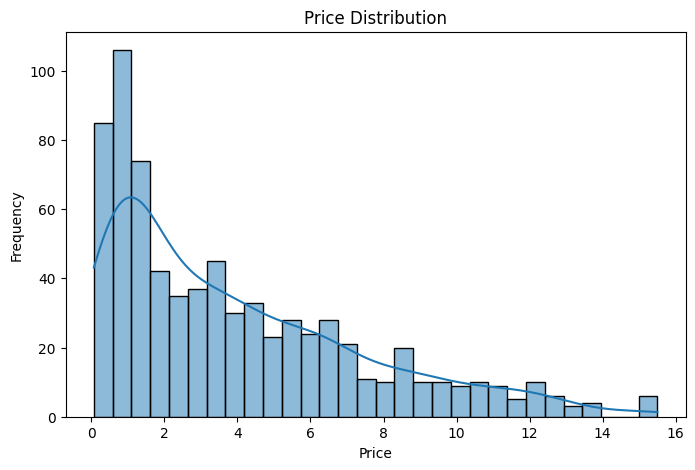

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_house_dataset.csv")
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


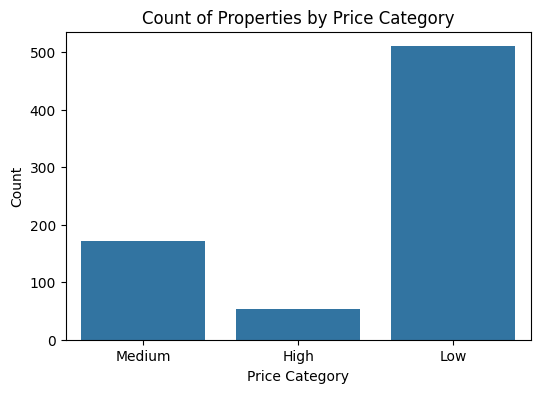

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='price_bin', data=df)
plt.title('Count of Properties by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()


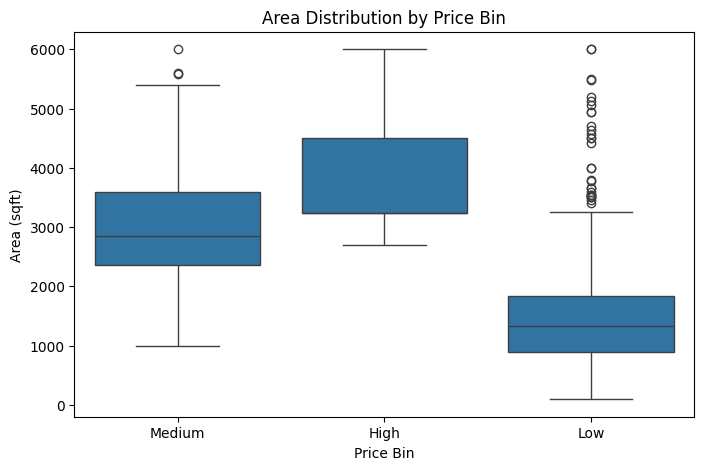

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_bin', y='area', data=df)
plt.title('Area Distribution by Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Area (sqft)')
plt.show()


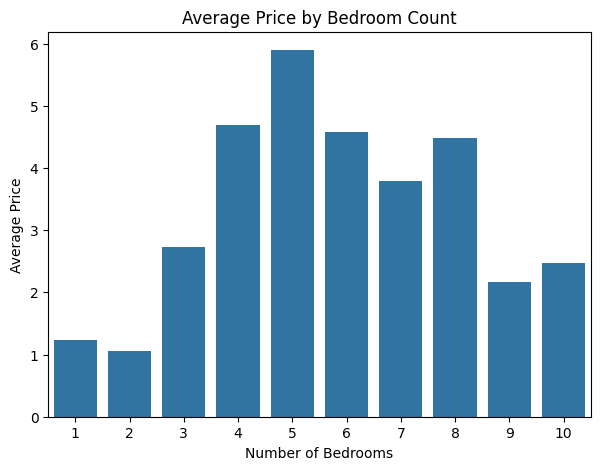

In [ ]:
plt.figure(figsize=(7, 5))
avg_price = df.groupby('bedRoom')['price'].mean().reset_index()
sns.barplot(x='bedRoom', y='price', data=avg_price)
plt.title('Average Price by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


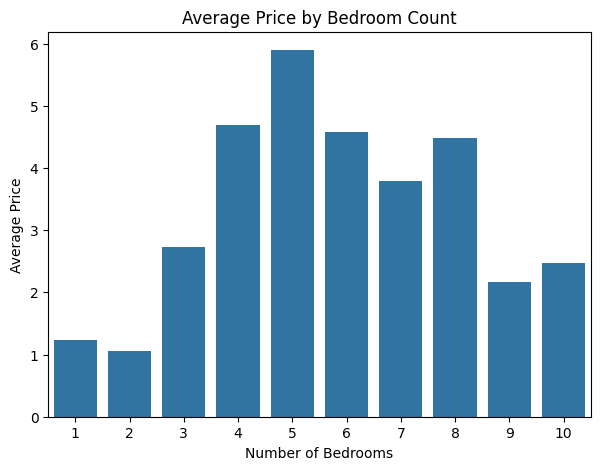

In [ ]:
plt.figure(figsize=(7, 5))
avg_price = df.groupby('bedRoom')['price'].mean().reset_index()
sns.barplot(x='bedRoom', y='price', data=avg_price)
plt.title('Average Price by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


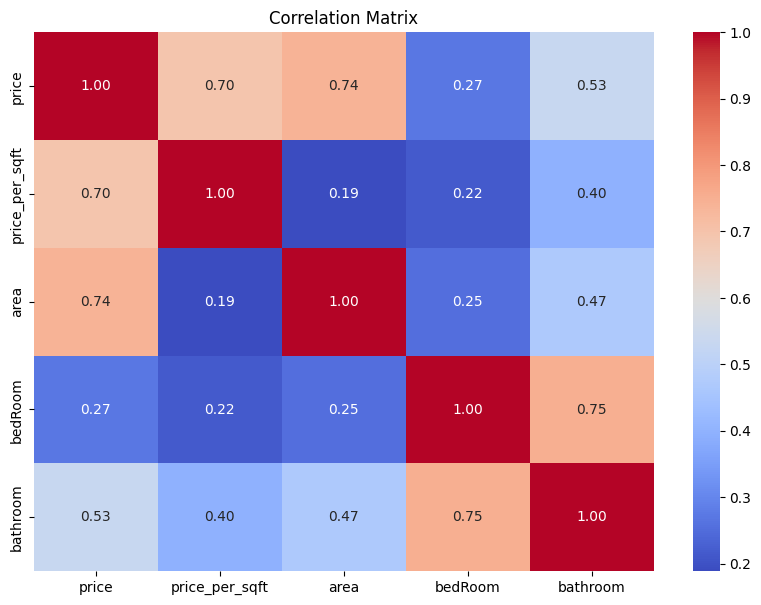

In [ ]:
plt.figure(figsize=(10, 7))
numeric_cols = ['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


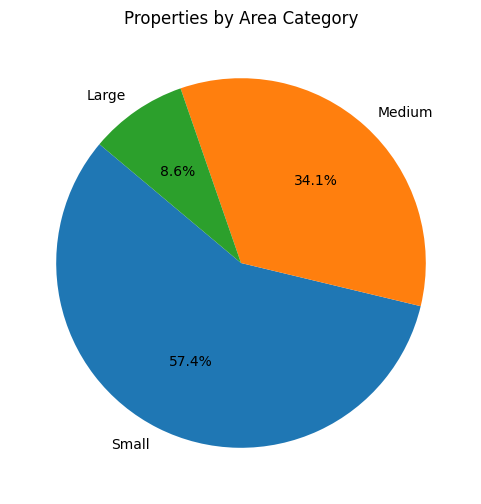

In [ ]:
plt.figure(figsize=(6, 6))
df['area_bin'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Properties by Area Category')
plt.ylabel('')
plt.show()
